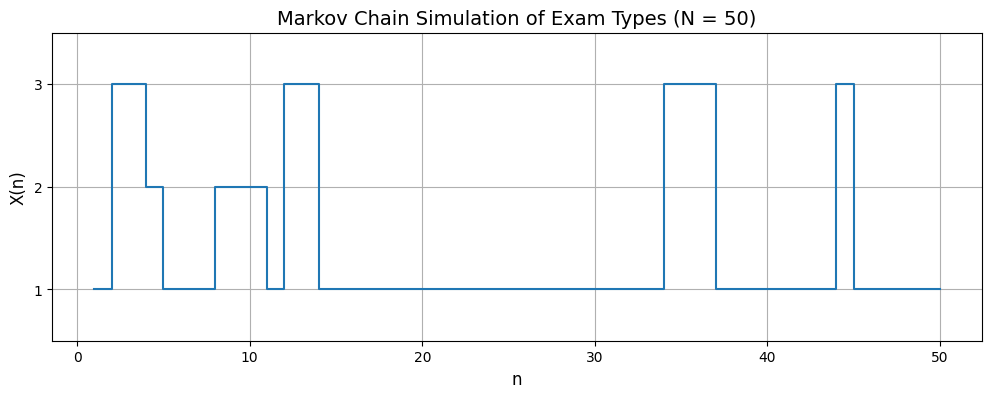

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) 

# Transition probability matrix for X(n)
P = np.array([
    [0.8, 0.1, 0.1],  # From exam type 1
    [0.6, 0.2, 0.2],  # From exam type 2
    [0.4, 0.3, 0.3]   # From exam type 3
])

# Function to simulate the Markov chain
def simulate_markov_chain(P, N, x0=1):
    states = [x0]  # initial state
    for _ in range(N - 1):
        current_state = states[-1] - 1
        next_state = np.random.choice([1, 2, 3], p=P[current_state])
        states.append(next_state)
    return np.array(states)

N = 50
states = simulate_markov_chain(P, N)

# Plot X(n)
plt.figure(figsize=(12, 4))
plt.step(range(1, N + 1), states)
plt.xlabel("n", fontsize=12)
plt.ylabel("X(n)", fontsize=12)
plt.title("Markov Chain Simulation of Exam Types (N = 50)", fontsize=14)
plt.ylim(0.5, 3.5)
plt.yticks([1, 2, 3])
plt.grid(True)
plt.show()


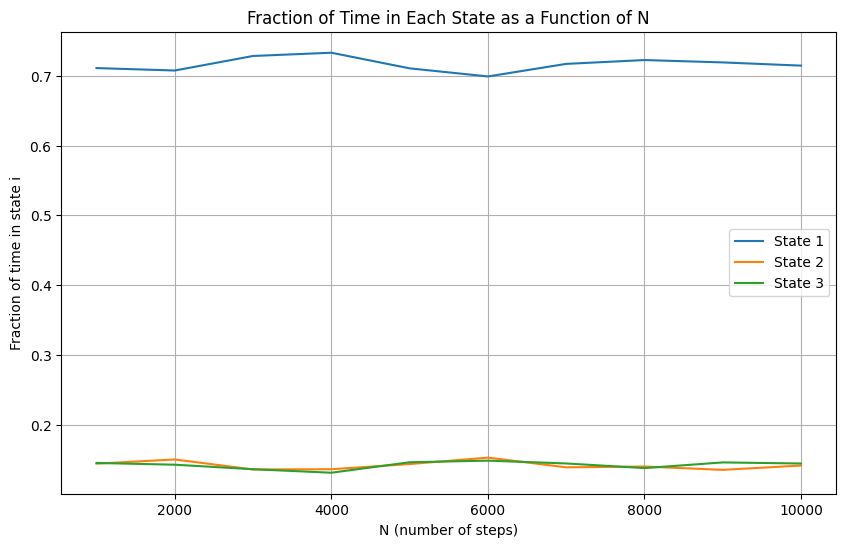

In [13]:
Ns = range(1000, 10001, 1000)

fractions_state1 = []
fractions_state2 = []
fractions_state3 = []

for N in Ns:
    states = simulate_markov_chain(P, N, x0=1)
    fractions_state1.append(np.mean(states == 1))
    fractions_state2.append(np.mean(states == 2))
    fractions_state3.append(np.mean(states == 3))

plt.figure(figsize=(10, 6))
plt.plot(Ns, fractions_state1, label='State 1')
plt.plot(Ns, fractions_state2, label='State 2')
plt.plot(Ns, fractions_state3, label='State 3')

plt.xlabel("N (number of steps)")
plt.ylabel("Fraction of time in state i")
plt.title("Fraction of Time in Each State as a Function of N")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
print(f'Average time in state 1: {np.mean(fractions_state1)*100:.2f}%')
print(f'Average time in state 2: {np.mean(fractions_state2)*100:.2f}%')
print(f'Average time in state 3: {np.mean(fractions_state3)*100:.2f}%')

Average time in state 1: 71.63%
Average time in state 2: 14.17%
Average time in state 3: 14.21%


**Comparison**

The simulation results closely match the stationary distribution found analytically: π=(0.7143,0.1429,0.1429) while the fractions found from simulation are 0.7163, 0.1417 and 0.1417 for states 1,2 and 3 respectively. The simulation proportions converge to these values rapidly as N increases. Any small differences between the analytical and simulation proportions are possibly due to finite-sample randomness, start-up effects where if you start in a particular state (state 1) there can be a small bias, and the dependence inherent in Markov sampling.